In [5]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

In [6]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [7]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./trashdata'+charname):
        os.makedirs('./trashdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./trashdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./trashdata'+charname):
        Image.open('./trashdata'+charname+'/'+png).resize((50,50)).save('./trashdata'+charname+'/'+png)

In [8]:
# 메탈 쓰레기
image_save('https://www.google.com/search?q=%EB%A9%94%ED%83%88%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYgMTaD8UrBJjZcoXB0ejjjZXE0og:1667533346124&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiisPzlzZP7AhXaNt4KHdZ5DHUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5','metal')

# 금속 사진
image_save('https://www.google.com/search?q=%EA%B8%88%EC%86%8D%EC%82%AC%EC%A7%84&sxsrf=ALiCzsZWUgCli9HM9aXViWTb-sQ_BLsMUw:1667585448154&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjE8JPyj5X7AhVX_GEKHY25DhYQ_AUoAXoECAIQAw&biw=1707&bih=956&dpr=1.5', 'metal1')

# 유리 쓰레기
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsaq14G6Dozn2OoZypk41jDZtJOT7g:1667533415257&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjh-PeGzpP7AhVcl1YBHd5eDegQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'glass')

# 유리 사진
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EB%B3%91%EC%82%AC%EC%A7%84&sxsrf=ALiCzsboGcYraCGzj5JGtEPkMNMt7Es1fQ:1667585399573&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjo4P7aj5X7AhVHVN4KHZQ4CnQQ_AUoAXoECAMQAw&biw=1707&bih=956&dpr=1.5', 'glass1')

# 종이 쓰레기
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYC9L5qJdGyqmMqqjakLIj1HulBow:1667533460827&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiHrNWczpP7AhUGmFYBHVyVBTUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'paper')

# 종이 사진 
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%82%AC%EC%A7%84&sxsrf=ALiCzsaqos5SvKAa7v47ezTeSP84RZsJyw:1667585343005&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjfiILAj5X7AhUC3mEKHWD5AvIQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'paper1')

# 플라스틱 쓰레기
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsbGqKr6AF6F6TpdksGB2H7Kl3qI1A:1667533505972&source=lnms&tbm=isch&sa=X&ved=2ahUKEwit0JiyzpP7AhXfrlYBHZSfAi0Q_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'plastic')

# 플라스틱류 사진
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1+%EC%82%AC%EC%A7%84&sxsrf=ALiCzsaEUoBi3eo3fly-x8K8avK85xigYA:1667585554739&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj8sP2kkJX7AhW5gFYBHY0uBu4Q_AUoAXoECAIQAw&biw=1707&bih=956&dpr=1.5', 'plastic1')

# 음식물 쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYd6U9ofgUrESbI6v60-pYMq5hkfQ:1667533565760&source=lnms&tbm=isch&sa=X&ved=2ahUKEwix5tnOzpP7AhVSm1YBHc5wBuQQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'food')

# 음식쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC&sxsrf=ALiCzsbpg_iXM3H21NgxkNGLAKPypaXmag:1667585630769&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiX8J3JkJX7AhVvpVYBHTnkDxEQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'food1')

# 건전지 쓰레기
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsb6pS2n5n6mUXzgnSm8ZcFzlaL-SQ:1667533619052&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi2zY7ozpP7AhW_plYBHcylCLMQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'battery')

# 건전지
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80&sxsrf=ALiCzsbZJclN1mKOFnYKaUZukwAFtnkF5g:1667585679875&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixitPgkJX7AhXAtlYBHcXMAlUQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'battery1')

In [9]:
def rota_save_bw(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [10]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save_co(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [11]:
# # 크롤링 데이터 로테이션시키는 함수
# def rota_save(color,foldname,data):
#     # 폴더 만들기
#     if not os.path.exists('./'+foldname):
#         os.makedirs(foldname)
    
#     rotation=[45,90,135,180,225,270,315]
#     for file in os.listdir('./'+data+'/'):
#         for rot in rotation:
#             img=np.array(Image.open('./'+file).convert(color))
#             rows,cols = img.shape[0:2]
#             ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
#             ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
#             # 이미지 저장
#             filename=f"{file}_ro{str(rot)}"
#             cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [12]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [14]:
# 흑백으로 로테이션
rota_save_bw('L','blwh','trashdatametal')
rota_save_bw('L','blwh','trashdatametal1')
rota_save_bw('L','blwh','trashdataglass')
rota_save_bw('L','blwh','trashdataglass1')
rota_save_bw('L','blwh','trashdatapaper')
rota_save_bw('L','blwh','trashdatapaper1')
rota_save_bw('L','blwh','trashdataplastic')
rota_save_bw('L','blwh','trashdataplastic1')
rota_save_bw('L','blwh','trashdatafood')
rota_save_bw('L','blwh','trashdatafood1')
rota_save_bw('L','blwh','trashdatabattery')
rota_save_bw('L','blwh','trashdatabattery1')

In [14]:
# # 원본사진 흑백으로
# data_con('L','blwh')

In [13]:
# rgb로 로테이션
rota_save_co('RGB','rgb','trashdatametal')
rota_save_co('RGB','rgb','trashdatametal1')
rota_save_co('RGB','rgb','trashdataglass')
rota_save_co('RGB','rgb','trashdataglass1')
rota_save_co('RGB','rgb','trashdatapaper')
rota_save_co('RGB','rgb','trashdatapaper1')
rota_save_co('RGB','rgb','trashdataplastic')
rota_save_co('RGB','rgb','trashdataplastic1')
rota_save_co('RGB','rgb','trashdatafood')
rota_save_co('RGB','rgb','trashdatafood1')
rota_save_co('RGB','rgb','trashdatabattery')
rota_save_co('RGB','rgb','trashdatabattery1')

In [21]:
# # 원본사진 색깔로
# data_con('RGB','rgb','trashdatametal')
# data_con('RGB','rgb','trashdataglass')
# data_con('RGB','rgb','trashdatapaper')
# data_con('RGB','rgb','trashdataplastic')
# data_con('RGB','rgb','trashdatafood')
# data_con('RGB','rgb','trashdatabattery')

In [15]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50*50)[0].tolist()
        else:
            n_list=n.reshape(-1,50*50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [16]:
blwh=solution('blwh')
blwh

array([[0.03921569, 0.25882353, 0.43529412, ..., 0.57254902, 0.29803922,
        0.09411765],
       [0.72941176, 0.75294118, 0.87843137, ..., 0.38431373, 0.36078431,
        0.36862745],
       [0.01960784, 0.20392157, 0.45882353, ..., 0.35294118, 0.34901961,
        0.34117647],
       ...,
       [0.61568627, 0.53333333, 0.5372549 , ..., 0.7254902 , 0.70588235,
        0.71764706],
       [0.37647059, 0.43529412, 0.57254902, ..., 0.56078431, 0.40784314,
        0.27843137],
       [0.58431373, 0.55686275, 0.5254902 , ..., 0.65882353, 0.69019608,
        0.65882353]])

In [17]:
print(f"흑백 사진 데이터 모양 {blwh.shape}")

흑백 사진 데이터 모양 (1750, 2500)


In [18]:
rgb=solution('rgb')
rgb

array([[[0.04313725, 0.03921569, 0.03921569],
        [0.27058824, 0.25490196, 0.24313725],
        [0.45882353, 0.42745098, 0.40784314],
        ...,
        [0.36862745, 0.7372549 , 0.28627451],
        [0.13333333, 0.41960784, 0.10980392],
        [0.01960784, 0.14117647, 0.05098039]],

       [[0.63921569, 0.80392157, 0.58039216],
        [0.65882353, 0.83529412, 0.57647059],
        [0.88627451, 0.88627451, 0.80784314],
        ...,
        [0.37647059, 0.39607843, 0.34509804],
        [0.38039216, 0.35686275, 0.34901961],
        [0.38431373, 0.36470588, 0.35294118]],

       [[0.02352941, 0.01960784, 0.00784314],
        [0.21960784, 0.20784314, 0.14117647],
        [0.45882353, 0.47843137, 0.36862745],
        ...,
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.36862745, 0.34117647, 0.33333333],
        [0.36078431, 0.3372549 , 0.3254902 ]],

       ...,

       [[0.68235294, 0.59215686, 0.56862745],
        [0.54901961, 0.54117647, 0.4627451 ],
        [0.55294118, 0

In [19]:
print(f"컬러 사진 데이터 모양 {rgb.shape}")

컬러 사진 데이터 모양 (1750, 2500, 3)


In [20]:
rgb

array([[[0.04313725, 0.03921569, 0.03921569],
        [0.27058824, 0.25490196, 0.24313725],
        [0.45882353, 0.42745098, 0.40784314],
        ...,
        [0.36862745, 0.7372549 , 0.28627451],
        [0.13333333, 0.41960784, 0.10980392],
        [0.01960784, 0.14117647, 0.05098039]],

       [[0.63921569, 0.80392157, 0.58039216],
        [0.65882353, 0.83529412, 0.57647059],
        [0.88627451, 0.88627451, 0.80784314],
        ...,
        [0.37647059, 0.39607843, 0.34509804],
        [0.38039216, 0.35686275, 0.34901961],
        [0.38431373, 0.36470588, 0.35294118]],

       [[0.02352941, 0.01960784, 0.00784314],
        [0.21960784, 0.20784314, 0.14117647],
        [0.45882353, 0.47843137, 0.36862745],
        ...,
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.36862745, 0.34117647, 0.33333333],
        [0.36078431, 0.3372549 , 0.3254902 ]],

       ...,

       [[0.68235294, 0.59215686, 0.56862745],
        [0.54901961, 0.54117647, 0.4627451 ],
        [0.55294118, 0

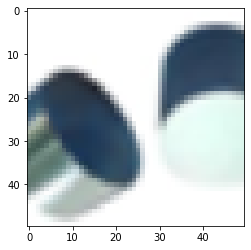

In [21]:
# 그래프 그려보기 => 컬러
plt.imshow(rgb[1100].reshape(50,50,3))

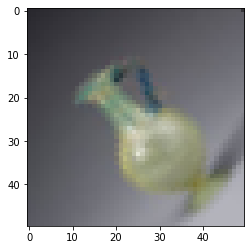

In [22]:
# 흑백 그래프 그려보기 => 흑백
plt.imshow(rgb[768].reshape(50,50,3),cmap='gray')

In [24]:
# 정규식을 활용한 브랜드 이름 분리
import re

brand_name=[]
for b in os.listdir('./rgb/'):
    l=re.split(r'[0-9]',b)[0]
    brand_name.append(l)
brand_name

['battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'ba

In [25]:
# 브랜드 이름/라벨로 타겟으로 저장
com_brand='angelinus'
i=0
target=[]
for brand in brand_name:
    if com_brand==brand:
        target.append([brand,i])
    else:
        i+=1
        com_brand=brand
        target.append([brand,i])

In [26]:
target_df=pd.DataFrame(target,columns=['name','label'])
target_df

,name,label
0,battery,1
1,battery,1
2,battery,1
3,battery,1
4,battery,1
...,...,...
1745,plastic,6
1746,plastic,6
1747,plastic,6
1748,plastic,6


In [27]:
target_df.iloc[1100,:]

name     metal
label        4
Name: 1100, dtype: object

In [28]:
target_df.to_csv('target.csv')

In [29]:
# 수정된 타겟 데이터 불러오기
target_final_df=pd.read_csv('target.csv')
target=np.array(target_final_df.label)

In [30]:
print(f"타켓 데이터 모양 {target.shape}")

타켓 데이터 모양 (1750,)


In [31]:
# 브랜드 이름 고유값
brand=sorted(list(set(target_final_df.name)))
brand

['battery', 'food', 'glass', 'metal', 'paper', 'plastic']

In [32]:
# 흑백데이터 훈련/검증/테스트
train_x_bw,test_x_bw,train_y,test_y=train_test_split(blwh,target,random_state=42,test_size=0.2,stratify=target)
train_x_bw,val_x_bw,train_y,val_y=train_test_split(train_x_bw,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [33]:
print(f"train_x_bw {train_x_bw.shape}, train_y {train_y.shape}")
print(f"val_x_bw {val_x_bw.shape}, train_y {val_y.shape}")
print(f"test_x_bw {test_x_bw.shape}, train_y {test_y.shape}")

train_x_bw (1120, 2500), train_y (1120,)
val_x_bw (280, 2500), train_y (280,)
test_x_bw (350, 2500), train_y (350,)


In [34]:
rgb_fl=rgb.reshape(-1,2500*3)
rgb_fl.shape

(1750, 7500)

In [35]:
# 컬러데이터 훈련/검증/테스트
train_x_co,test_x_co,train_y,test_y=train_test_split(rgb_fl,target,random_state=42,test_size=0.2,stratify=target)
train_x_co,val_x_co,train_y,val_y=train_test_split(train_x_co,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [36]:
print(f"train_x_co {train_x_co.shape}, train_y {train_y.shape}")
print(f"val_x_co {val_x_co.shape}, val_y {val_y.shape}")
print(f"test_x_co {test_x_co.shape}, test_y {test_y.shape}")

train_x_co (1120, 7500), train_y (1120,)
val_x_co (280, 7500), val_y (280,)
test_x_co (350, 7500), test_y (350,)


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA()

In [39]:
pca.fit(train_x_bw)

PCA()

In [40]:
# 분산비율
pca.explained_variance_ratio_

array([4.86777332e-01, 4.78400094e-02, 3.86046921e-02, ...,
       2.78740944e-33, 2.78740944e-33, 2.78740934e-33])

In [41]:
# 설명력
cumsum=np.round(np.cumsum(pca.explained_variance_ratio_),4)
d=np.argmax(cumsum>=0.95)+1 # 최적 주성분 개수

print(f"주성분 누적 설명정도 {cumsum}")
print(f"주성분 개수(차원): {d}")

주성분 누적 설명정도 [0.4868 0.5346 0.5732 ... 1.     1.     1.    ]
주성분 개수(차원): 143


In [42]:
# # 설명력 그래프 그려보기
# plt.figure(figsize=(15,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.xlabel('Dimention')
# plt.ylabel('Explained Variance')
# plt.show()

In [43]:
# 최적의 주성분 개수로 다시 모델 생성
pca=PCA(n_components=d)
pca.fit(train_x_bw)

PCA(n_components=143)

In [44]:
# 주성분 개수 마다 모델과 예측값 구하기 함수
def pca_pre(n_pca,data):
    pca=PCA(n_components=n_pca)
    pca.fit(train_x_bw)
    pre_out=pca.transform(data)

    return pca, pre_out

In [45]:
# 원본데이터와 예측데이터의 그래프 비교 함수
def compimage(mopca,raw,comp):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.imshow(raw.reshape(50,50,1),cmap='gray')
    plt.title('원본데이터')
    
    re_comp=mopca.inverse_transform(comp)
    plt.subplot(1,2,2)
    plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
    plt.title('PCA된 그림')
    plt.tight_layout()
    plt.show()

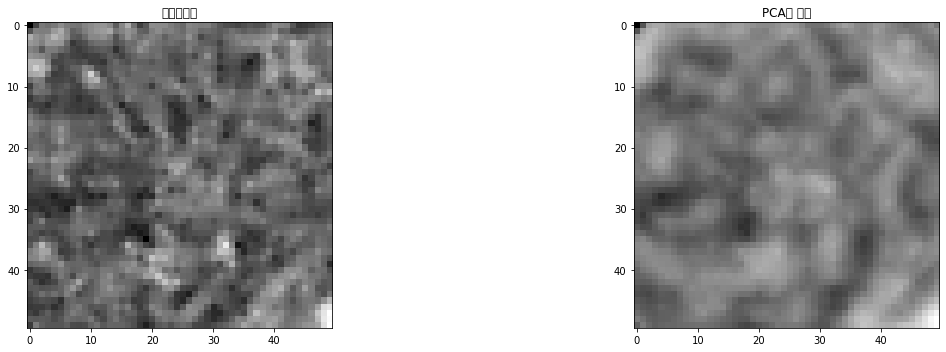

In [46]:
mopca,comp=pca_pre(d,test_x_bw)
compimage(mopca,test_x_bw[1],comp[1])

In [47]:
# 주성분 개수마다 그래프 그려보기
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,1),cmap='gray')
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_bw)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [48]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[0]]}")
# pca_grape([1,30,40,50,100,200,500,834,1000,2000],test_x_bw,0)

In [49]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[100]]}")
# pca_grape([1,25,60,100,200,345,567,834,900,2500],test_x_bw,100)

## 컬러

In [50]:
pcacolor=PCA()

In [51]:
pcacolor.fit(train_x_co)

PCA()

In [52]:
# 누적 설명력과 최적 차원개수 구하기
cumsum_co=np.round(np.cumsum(pcacolor.explained_variance_ratio_),6)
d=np.argmax(cumsum_co>=0.95)+1

print(f"누적 설명력은 {cumsum_co}")
print(f"최적의 차원 개수는 {d}입니다.")

누적 설명력은 [0.452816 0.497978 0.533184 ... 1.       1.       1.      ]
최적의 차원 개수는 196입니다.


In [53]:
# # 누적 설명력 그래프 그리기
# plt.figure(figsize=(20,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.show()

In [54]:
# 주성분 개수마다 그래프 그려보기 => 색깔
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,3))
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_co)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,3),vmin=0,vmax=1)
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [55]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[10]]}")
# pca_grape([1,10,59,167,540,900,2000,2300,2400,2450],test_x_co,62)

In [56]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras import layers,callbacks,Sequential

In [57]:
# # 사전 학습된 VGG16모델 불러오기
# model=VGG16(weights='imagenet',include_top=False,input_shape=(50,50,3))

In [58]:
# # 모델 확인
# model.summary(show_trainable=True)

In [59]:
# remodel = Sequential()
# remodel.add(model)
# remodel.add(layers.Flatten())
# remodel.add(layers.Dense(512,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(216,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(26, activation='softmax'))

In [60]:
# remodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [61]:
# modelES=callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
# modelMC=callbacks.ModelCheckpoint('best_model',save_best_only=True,save_weights_only=True)

In [62]:
# remodel.summary()

In [63]:
train_xx = train_x_co.reshape(-1,50,50,3)
test_xx = test_x_co.reshape(-1,50,50,3)
val_xx = val_x_co.reshape(-1,50,50,3)

In [64]:
train_xx.shape

(1120, 50, 50, 3)

In [65]:
train_y.shape

(1120,)

In [66]:
# remodel.fit(train_xx,train_y,callbacks=[modelES,modelMC],validation_data=(val_xx,val_y),epochs=100)

## 모델

In [67]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 58)        1624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 58)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 100)       52300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 100)               1

In [69]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(train_xx)

In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
History1 = model.fit_generator(train_datagen.flow(train_xx,train_y, batch_size=32),
                              epochs = 100, validation_data = (val_xx,val_y),
                              verbose = 1, steps_per_epoch=train_xx.shape[0] // 32)

Epoch 1/100
35/35 [==============================] - 3s 68ms/step - loss: 1.7649 - accuracy: 0.3375 - val_loss: 1.4015 - val_accuracy: 0.4643
Epoch 2/100
35/35 [==============================] - 2s 67ms/step - loss: 1.2979 - accuracy: 0.4866 - val_loss: 1.1730 - val_accuracy: 0.5429
Epoch 3/100
35/35 [==============================] - 2s 68ms/step - loss: 1.2467 - accuracy: 0.5089 - val_loss: 1.1088 - val_accuracy: 0.5714
Epoch 4/100
35/35 [==============================] - 2s 71ms/step - loss: 1.1723 - accuracy: 0.5420 - val_loss: 1.1482 - val_accuracy: 0.5643
Epoch 5/100
35/35 [==============================] - 3s 73ms/step - loss: 1.1218 - accuracy: 0.5688 - val_loss: 1.0214 - val_accuracy: 0.6036
Epoch 6/100
35/35 [==============================] - 3s 77ms/step - loss: 1.0166 - accuracy: 0.6018 - val_loss: 1.0582 - val_accuracy: 0.5786
Epoch 7/100
35/35 [==============================] - 3s 77ms/step - loss: 1.0452 - accuracy: 0.5964 - val_loss: 0.9540 - val_accuracy: 0.6214
Epoch 

35/35 [==============================] - 5s 133ms/step - loss: 0.2580 - accuracy: 0.9000 - val_loss: 0.4075 - val_accuracy: 0.8571
Epoch 59/100
35/35 [==============================] - 5s 133ms/step - loss: 0.2608 - accuracy: 0.9089 - val_loss: 0.6392 - val_accuracy: 0.7786
Epoch 60/100
35/35 [==============================] - 4s 124ms/step - loss: 0.2611 - accuracy: 0.9170 - val_loss: 0.5874 - val_accuracy: 0.8321
Epoch 61/100
35/35 [==============================] - 4s 114ms/step - loss: 0.2836 - accuracy: 0.9027 - val_loss: 0.7432 - val_accuracy: 0.7929
Epoch 62/100
35/35 [==============================] - 4s 109ms/step - loss: 0.2733 - accuracy: 0.9027 - val_loss: 0.6064 - val_accuracy: 0.8357
Epoch 63/100
35/35 [==============================] - 4s 102ms/step - loss: 0.2772 - accuracy: 0.9009 - val_loss: 0.7698 - val_accuracy: 0.7786
Epoch 64/100
35/35 [==============================] - 4s 101ms/step - loss: 0.2495 - accuracy: 0.9018 - val_loss: 0.4953 - val_accuracy: 0.8857
Epoch

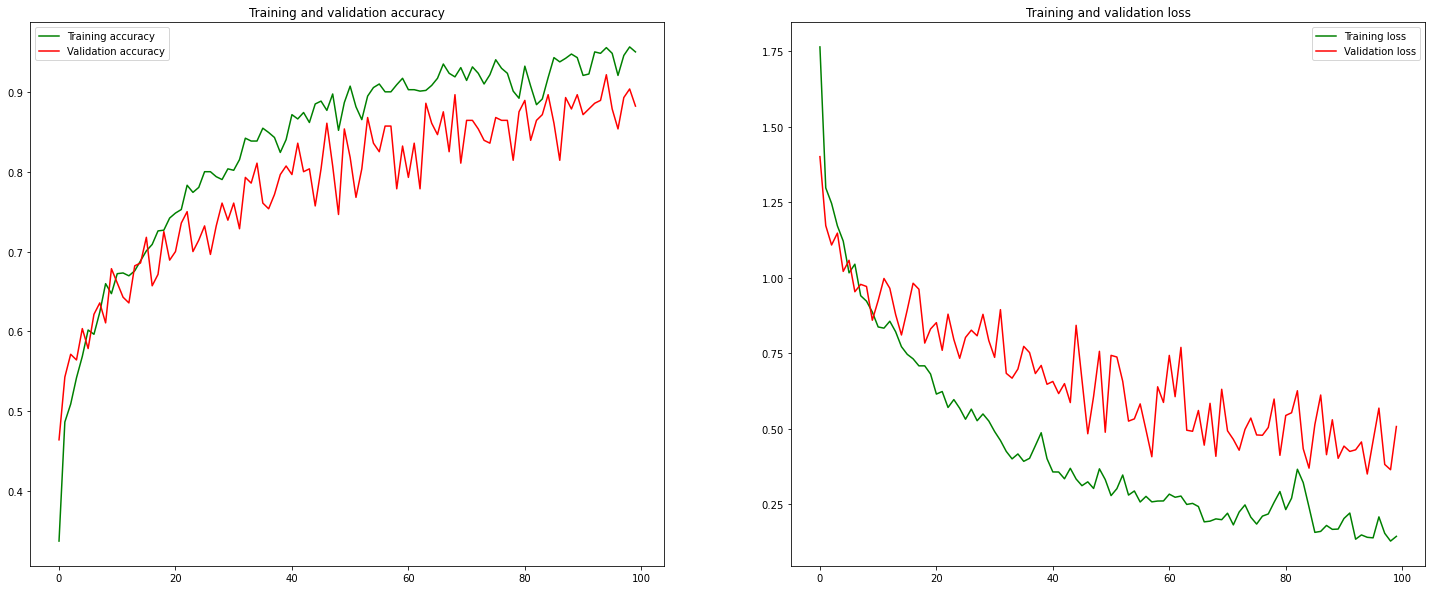

In [75]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(25, 10))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(fontsize=10)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(History1)

In [76]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [77]:
test_x_co.shape

(350, 7500)

In [78]:
test_y.shape

(350,)

In [79]:
model.evaluate(test_xx, test_y)

11/11 [==============================] - 0s 17ms/step - loss: 0.4308 - accuracy: 0.8600


[0.4308067560195923, 0.8600000143051147]

In [80]:
pre_y=model.predict(test_xx[30].reshape(-1, 50, 50, 3))

1/1 [==============================] - 0s 83ms/step


In [81]:
pre_y.round(2)

array([[0.  , 0.93, 0.  , 0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [82]:
test_y[30]

4

In [83]:
df = pd.DataFrame(target_df.name.unique())
df['label'] = target_df.label.unique()
df.columns = ['Brand', 'Label']
df

,Brand,Label
0,battery,1
1,food,2
2,glass,3
3,metal,4
4,paper,5
5,plastic,6


## 새로운 사진으로 예측

In [87]:
def img_preprocessing(FILENAME):
    img = Image.open(FILENAME)
    img = img.resize((50,50))
    img = np.array(img)
    img = img.reshape(-1, 50, 50, 3)
    plt.imshow(img.reshape(50,50,3))
    print(df.Brand[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 53ms/step
food


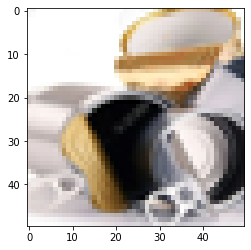

In [89]:
a=img_preprocessing('./test.img/metal.JPG')

1/1 [==============================] - 0s 16ms/step
food


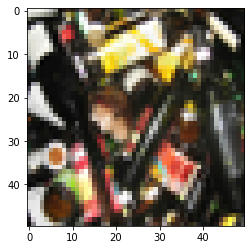

In [90]:
b=img_preprocessing('./test.img/glass.JPG')

1/1 [==============================] - 0s 15ms/step
metal


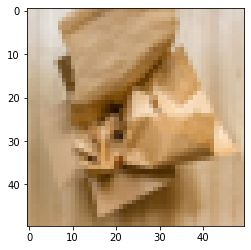

In [91]:
c=img_preprocessing('./test.img/paper.JPG')

1/1 [==============================] - 0s 16ms/step
metal


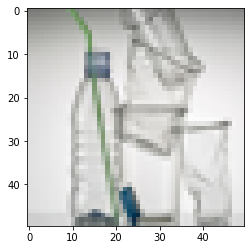

In [92]:
d=img_preprocessing('./test.img/plastic.JPG')

1/1 [==============================] - 0s 16ms/step
plastic


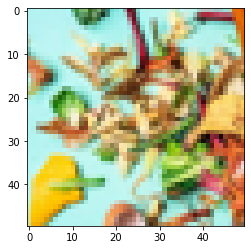

In [93]:
e=img_preprocessing('./test.img/food.JPG')

1/1 [==============================] - 0s 15ms/step
food


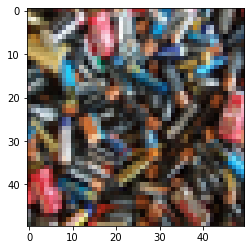

In [94]:
f=img_preprocessing('./test.img/battery.JPG')

In [84]:
metal_img = Image.open('./trashdatametal/metal0.png')
metal_img1 = Image.open('./trashdatametal1/metal10.png')
glass_img = Image.open('./trashdataglass/glass0.png')
glass_img1 = Image.open('./trashdataglass1/glass10.png')
paper_img = Image.open('./trashdatapaper/paper0.png')
paper_img1 = Image.open('./trashdatapaper1/paper10.png')
plastic_img = Image.open('./trashdataplastic/plastic0.png')
plastic_img1 = Image.open('./trashdataplastic1/plastic10.png')
food_img = Image.open('./trashdatafood/food0.png')
food_img1 = Image.open('./trashdatafood1/food10.png')
battery_img = Image.open('./trashdatabattery/battery0.png')
battery_img1 = Image.open('./trashdatabattery1/battery10.png')

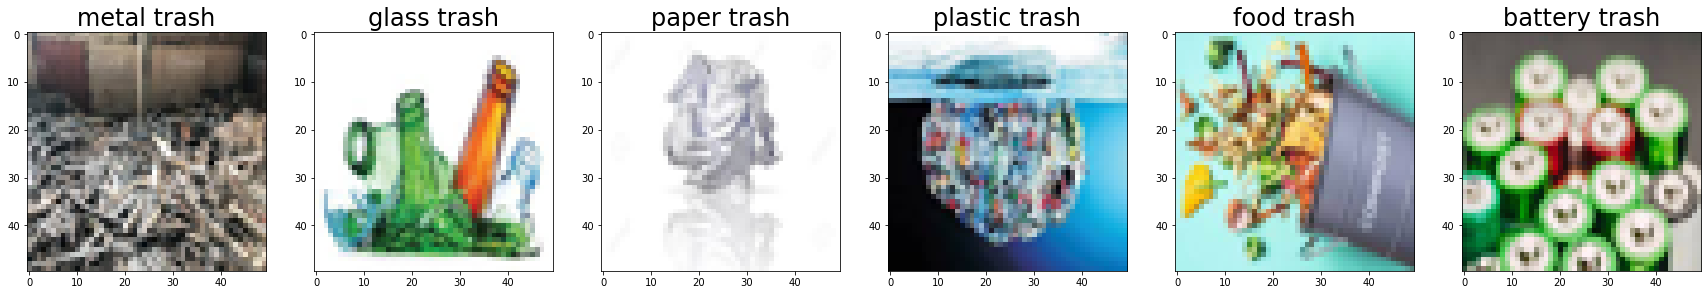

In [85]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img)
plt.title('metal trash', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img)
plt.title('glass trash', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img)
plt.title('paper trash', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img)
plt.title('plastic trash', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img)
plt.title('food trash', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img)
plt.title('battery trash', fontsize=24)
plt.show()

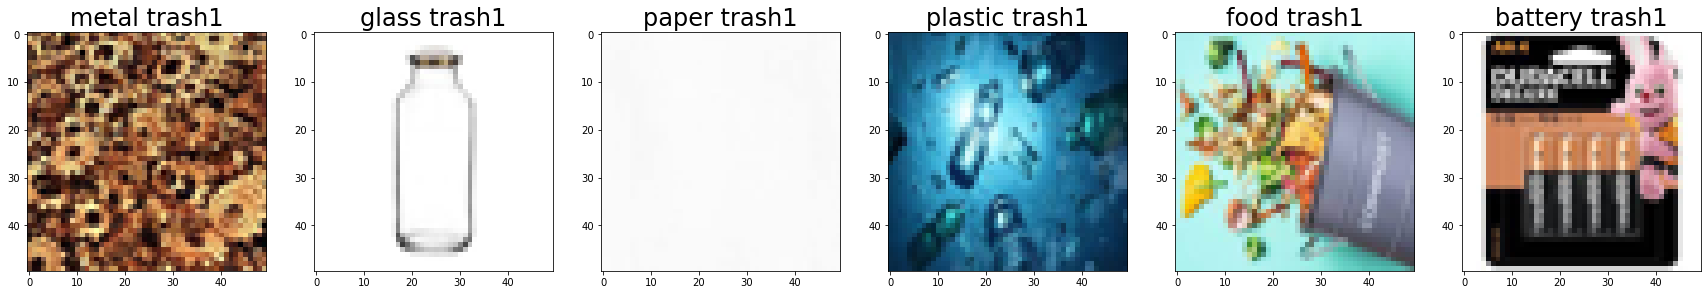

In [86]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img1)
plt.title('metal trash1', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img1)
plt.title('glass trash1', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img1)
plt.title('paper trash1', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img1)
plt.title('plastic trash1', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img1)
plt.title('food trash1', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img1)
plt.title('battery trash1', fontsize=24)
plt.show()

In [30]:
allmetalimg = []
allglassimg = []
allpaperimg = []
allplasticimg = []
allfoodimg = []
allbatteryimg = []

metal_len = len(os.listdir('./trashdatametal/'))
for i in range(metal_len):
    a = Image.open('./trashdatametal/metal'+str(i)+'.png')
    allmetalimg.append(np.array(a).reshape(-1,50*50)[0].tolist())

glass_len = len(os.listdir('./trashdataglass/'))
for j in range(glass_len):
    b = Image.open('./trashdataglass/glass'+str(j)+'.png')
    allglassimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
paper_len = len(os.listdir('./trashdatapaper/'))
for o in range(paper_len):
    c = Image.open('./trashdatapaper/paper'+str(o)+'.png')
    allpaperimg.append(np.array(c).reshape(-1,50*50)[0].tolist())

plastic_len = len(os.listdir('./trashdataplastic/'))
for f in range(plastic_len):
    d = Image.open('./trashdataplastic/plastic'+str(f)+'.png')
    allplasticimg.append(np.array(d).reshape(-1,50*50)[0].tolist())

food_len = len(os.listdir('./trashdatafood/'))
for g in range(food_len):
    e = Image.open('./trashdatafood/food'+str(g)+'.png')
    allfoodimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

battery_len = len(os.listdir('./trashdatabattery/'))
for k in range(battery_len):
    q = Image.open('./trashdatabattery/battery'+str(k)+'.png')
    allbatteryimg.append(np.array(q).reshape(-1,50*50)[0].tolist())

In [31]:
print('메탈 쓰레기 : ', len(allmetalimg))
print('유리 쓰레기 : ', len(allglassimg))
print('종이 쓰레기 : ', len(allpaperimg))
print('플라스틱 쓰레기 : ', len(allplasticimg))
print('음식 쓰레기 : ', len(allfoodimg))
print('건전지 쓰레기 : ', len(allbatteryimg))

메탈 쓰레기 :  28
유리 쓰레기 :  27
종이 쓰레기 :  26
플라스틱 쓰레기 :  22
음식 쓰레기 :  27
건전지 쓰레기 :  30


In [32]:
allimgplus=np.row_stack((allmetalimg, allglassimg, allpaperimg, allplasticimg, allfoodimg, allbatteryimg))
allimgplus.shape

(160, 2500)

In [33]:
target1=np.array([0]*metal_len)
target2=np.array([1]*glass_len)
target3=np.array([2]*paper_len)
target4=np.array([3]*plastic_len)
target5=np.array([4]*food_len)
target6=np.array([5]*battery_len)

In [34]:
target=np.concatenate([target1, target2, target3, target4, target5, target6])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [35]:
allimgplus

array([[151, 148, 148, ...,  44,  36,  67],
       [253, 253, 253, ...,  94,  82, 119],
       [185, 187, 215, ..., 195, 228, 184],
       ...,
       [255, 255, 255, ..., 107, 172,   9],
       [ 80,  78,  59, ..., 159, 101, 192],
       [255, 255, 255, ...,  99, 107, 222]])

In [ ]:
# 스케일링
allimgplus=allimgplus/255.0

allimgplus=allimgplus.reshape(-1,50,50,1)

In [ ]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(allimgplus, target,
                                                    random_state=42,
                                                    stratify=target)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

## 모델

In [ ]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,1)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 100, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
plt.imshow(x_val[3].reshape(50,50), cmap='gray')
plt.title(f'Label - {y_val[3]}')
plt.show()